# LDA over Time

In [208]:
from utils import * 
import plotly.plotly as py
import plotly 
import time
import datetime
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plotly.tools.set_credentials_file(username='kt426', api_key='GcKIXRGajqJ9KlQAcL2L')

### Load dataframe

In [6]:
DATAPASS = '../../../yelp10/dataset/business.json'
business = load_json_to_df(DATAPASS)

In [7]:
DATAPASS2 = '../../../yelp10/dataset/review.json'
review = load_json_to_df(DATAPASS2)

In [8]:
categories = {}
for C in business.categories:
    for c in C:
        if c in categories:
            categories[c] += 1
        else:
            categories[c] = 1

In [9]:
categories = sorted(categories.items(), key=lambda x: x[1], reverse = True)

In [19]:
categories[:40]

[('Restaurants', 51613),
 ('Shopping', 24595),
 ('Food', 23014),
 ('Beauty & Spas', 15139),
 ('Home Services', 13202),
 ('Health & Medical', 12033),
 ('Nightlife', 11364),
 ('Bars', 9868),
 ('Automotive', 9476),
 ('Local Services', 9343),
 ('Event Planning & Services', 8038),
 ('Active Life', 7427),
 ('Fashion', 6299),
 ('Sandwiches', 5864),
 ('Fast Food', 5792),
 ('American (Traditional)', 5737),
 ('Pizza', 5652),
 ('Coffee & Tea', 5565),
 ('Hair Salons', 5395),
 ('Hotels & Travel', 5188),
 ('Arts & Entertainment', 5054),
 ('Home & Garden', 4584),
 ('Auto Repair', 4480),
 ('Italian', 4411),
 ('Burgers', 4236),
 ('Doctors', 4124),
 ('Breakfast & Brunch', 4103),
 ('Mexican', 3913),
 ('Nail Salons', 3884),
 ('Professional Services', 3865),
 ('American (New)', 3802),
 ('Chinese', 3775),
 ('Real Estate', 3729),
 ('Specialty Food', 3620),
 ('Fitness & Instruction', 3615),
 ('Pets', 3153),
 ('Grocery', 3044),
 ('Bakeries', 3014),
 ('Cafes', 2812),
 ('Hair Removal', 2704)]

In [13]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [14]:
def business_id_retrieval(cat, business):
    '''
    
    Input:
        cat(str) : category
        business(dataframe) : the business data
    Output:
        id_list(set) : business ids of a particular category
    '''
    id_list = set()
    idx = 0
    for row in business.values:
        categories = row[3]
        if cat in categories:
            id_list.add(row[2])
    return id_list

## Experiment with Pizza and Chinese

In [15]:
pizza = business_id_retrieval('Pizza', business)

In [16]:
review_pizza = review.loc[review['business_id'].isin(pizza)]

In [20]:
chinese = business_id_retrieval('Chinese', business)

In [21]:
review_chinese = review.loc[review['business_id'].isin(chinese)]

### Observe review count over time

In [17]:
import plotly.graph_objs as go
data = [go.Scatter(x=review_pizza.groupby('date').count()['review_id'].keys()\
                   ,y=review_pizza.groupby('date').count()['review_id'].values)]
layout = go.Layout( title='Piazza Reviews',
    xaxis={'title':'Date'},
    yaxis={'title':'Number of reviews'},
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Apply STL Decomposition

In [295]:
y = review_pizza.groupby('date').count()['review_id'].values
result = seasonal_decompose(y, model='additive', freq = 30)

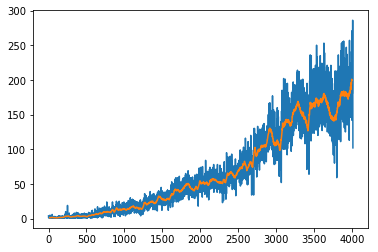

In [296]:
plt.plot(result.observed)
plt.plot(result.trend)
plt.show()

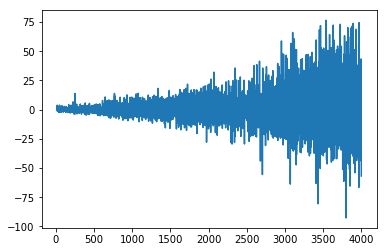

In [297]:
plt.plot(result.resid)
plt.show()

In [298]:
y = review_pizza.groupby('date').count()['review_id'].values
result = seasonal_decompose(y, model='multiplicative', freq = 30)

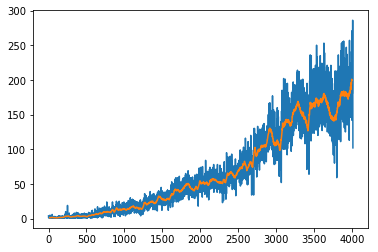

In [299]:
plt.plot(result.observed)
plt.plot(result.trend)
plt.show()

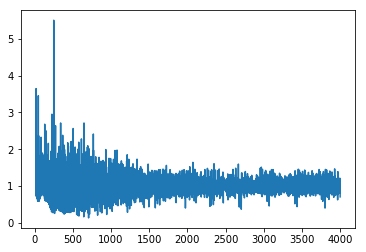

In [300]:
plt.plot(result.resid)
plt.show()

In [22]:
data = [go.Scatter(x=review_chinese.groupby('date').count()['review_id'].keys()\
                   ,y=review_chinese.groupby('date').count()['review_id'].values)]
layout = go.Layout( title='Chinese Reviews',
    xaxis={'title':'Date'},
    yaxis={'title':'Number of reviews'},
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [301]:
y = review_chinese.groupby('date').count()['review_id'].values
result = seasonal_decompose(y, model='additive', freq = 30)

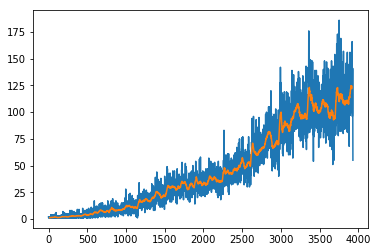

In [302]:
plt.plot(result.observed)
plt.plot(result.trend)
plt.show()

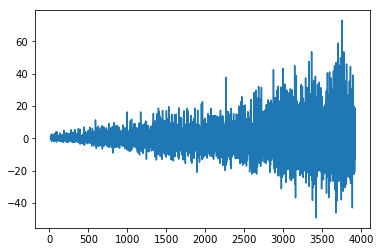

In [303]:
plt.plot(result.resid)
plt.show()

In [304]:
y = review_chinese.groupby('date').count()['review_id'].values
result = seasonal_decompose(y, model='multiplicative', freq = 30)

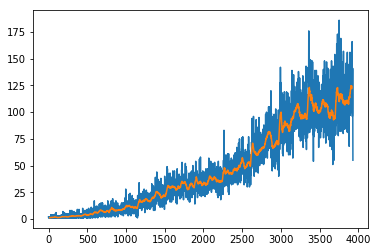

In [305]:
plt.plot(result.observed)
plt.plot(result.trend)
plt.show()

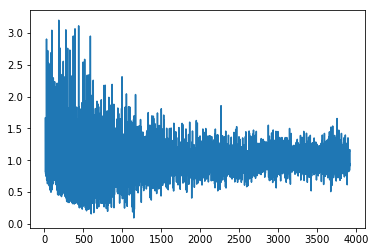

In [306]:
plt.plot(result.resid)
plt.show()

Later, we need to normalize the growth factor

### Investigate review text, tf-idf and LDA

In [23]:
vectorizer = CountVectorizer(max_df = 0.3)
doc = vectorizer.fit_transform(review_pizza['text'])

This takes forever, don't do it on your machine

In [ ]:
freqs1 = [(word, doc.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
print (sorted (freqs1, key = lambda x: -x[1])[:20])

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(review_pizza['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

This also takes long time, we need an access to the server

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [26]:
'''
Thanks Eric Ma
'''
def display_topics(model, feature_names, n_top_words):
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % topic_index)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words:-1]]))

In [27]:
display_topics(nmf, tfidf_feature_names, 10)

Topic 0:
night late dinner went friday date saturday open wine
Topic 1:
pizza better hut places joint pepperoni price dough ny
Topic 2:
minutes table said wait came asked told server took
Topic 3:
order called phone online pick placed wrong customer told
Topic 4:
good pretty prices price overall bit decent value quite
Topic 5:
place eat looking clean people friends family favorite want
Topic 6:
ordered came large tasted half didn pepperoni wasn husband
Topic 7:
service customer slow fast horrible terrible bad friendly poor
Topic 8:
great atmosphere prices spot experience family fantastic service price
Topic 9:
staff friendly super helpful clean fast attentive wait family
Topic 10:
love favorite family absolutely kids coming come salads yummy
Topic 11:
fresh ingredients quality hot mozzarella tasty basil oven dough
Topic 12:
wings hot buffalo crispy ranch honey bbq fries medium
Topic 13:
und die der das ist sehr ich nicht war
Topic 14:
sauce garlic bread knots tomato red pasta marinara 

In [28]:
chinese_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
chinese_tfidf = chinese_vectorizer.fit_transform(review_chinese['text'])
chinese_tfidf_feature_names = chinese_vectorizer.get_feature_names()

In [29]:
chinese_nmf = NMF(n_components=50, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(chinese_tfidf)

In [30]:
display_topics(chinese_nmf, chinese_tfidf_feature_names, 10)

Topic 0:
got table came minutes asked said didn went wait
Topic 1:
food fresh asian quality eat fast panda express court
Topic 2:
dim sum carts cart mai places har items vegas
Topic 3:
chicken orange general sweet kung tso sesame pao sour
Topic 4:
noodles hand broth dan pulled bowl noodle ramen singapore
Topic 5:
chinese authentic restaurants area american china typical real style
Topic 6:
good pretty overall prices little bit value pricey thing
Topic 7:
sushi roll fresh bar rolls sashimi tuna salmon fish
Topic 8:
egg rolls roll spring drop crab young soup puffs
Topic 9:
fried deep pan congee stir fish crab rice house
Topic 10:
dumplings dumpling steamed pan pancake lamb boiled onion shanghai
Topic 11:
delicious fresh absolutely favorite super perfect loved wonderful yummy
Topic 12:
lunch specials special dinner quick today went roll cheap
Topic 13:
rice white brown fried sticky steamed roll bowl curry
Topic 14:
soup noodle wonton bowl broth wontons base drop ton
Topic 15:
great awesom

In [34]:
print(chinese_tfidf.shape)
print (tfidf.shape)

(178151, 1000)
(268726, 1000)


## Split the review by nouns, verbs etc

In [36]:
review_pizza.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1105,cQSQi0YWTcpuw5WGJi9XMw,0,2012-06-08,0,_iw0IGlFZtPCqxP5xcsTIQ,3,"Wie schon erwähnt, rustikales und eher altback...",0,-IbGzbx2qsGjJHm78fbj8w
1106,cQSQi0YWTcpuw5WGJi9XMw,0,2011-10-19,0,k2WNspTH6Mazkz4dxeIf4g,5,"Bodenständige italienische Küche, eher rustika...",0,bVkNsrA6W0LwEIVIKhiV-w
1107,cQSQi0YWTcpuw5WGJi9XMw,0,2011-01-10,0,BWCCewfflc2wI6AdPT8-Fg,5,Eine kleine und gemütliche Pizzeria mit lecker...,0,7EpMV3KhqozTdG2qVE1-fw
1108,cQSQi0YWTcpuw5WGJi9XMw,0,2013-01-15,0,-R-OianhKSSuLiZ6mzR19g,5,Tolle italienische Küche in einer unscheinbare...,0,4xqaWaXGO0el_jmTkm3c0A
1109,cQSQi0YWTcpuw5WGJi9XMw,2,2015-10-07,0,bokbBFumrarDfaQwMoR9Bg,5,Ein Vorurteil verwandelte sich bei dieser Pizz...,2,natSObJ4-jEev6rJRta7jA


In [119]:
def extract_word_type(s):
    tagged = nltk.pos_tag(nltk.word_tokenize(s.lower()))
    noun = [item[0] for item in tagged if item[1][0] == 'N']
    verb = [item[0] for item in tagged if item[1][0] == 'V']
    adjective = [item[0] for item in tagged if item[1][0] == 'J']
    adverb = [item[0] for item in tagged if item[1][0] == 'R']
    return ' '.join(noun), ' '.join(verb), ' '.join(adjective), ' '.join(adverb)

In [106]:
x = review_pizza.head(10)

In [124]:
[extract_word_type(t) for t in x['text'].values]

[('wie schon erwähnt altbackenes ist sehr freundlich wir pizza war kein zum schick essen gehen eine pizza zwischendurch eine empfehlung',
  'rustikales aber die aber',
  'eher gemütlich bedienung hatten recht passabel insgesamt laden für',
  'ambiente'),
 ('bodenständige italienische küche rustikales unedles freundliche schnarchige kellner der chef da ist es liebenswert und gemütlich immer wieder gerne hin',
  'aber',
  'sehr manchmal wenn noch nicht finde gehe',
  'ambiente'),
 ('kleine gemütliche pizzeria und gutes service',
  'mit',
  'eine leckeren pizzen preis-leistungsverhältnis freundlicher',
  'nudelgerichten'),
 ('tolle italienische küche einer location west service als speisen sind preis-leistungs verhältnis als gutschein angenommen als es ein grapa aufs haus zu empfehlen',
  'ist gut dankeschön',
  'unscheinbaren stuttgart sowohl auch die super und mehr wurde gerne gab sehr',
  ''),
 ('verwandelte bei dieser pizzeria absolute überraschung wir sind schon öfter dieser pizzeria

This takes long time, too. 

In [128]:
w_type_chinese = review_chinese['text'].apply(lambda x : extract_word_type(x))

In [129]:
w_type_pizza = review_pizza['text'].apply(lambda x : extract_word_type(x))

In [133]:
noun_p = [i[0] for i in w_type_pizza]
verb_p = [i[1] for i in w_type_pizza]
adj_p = [i[2] for i in w_type_pizza]
adv_p = [i[3] for i in w_type_pizza]

In [138]:
review_pizza.loc[:, 'text_noun'] = noun_p
review_pizza.loc[:, 'text_verb'] = verb_p
review_pizza.loc[:, 'text_adj'] = adj_p
review_pizza.loc[:, 'text_adv'] = adv_p

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [140]:
review_pizza.to_csv('pizza_reviews_by_wordtype.csv', index = False)
# pd.read_csv('pizza_reviews_by_wordtype.csv', index_col = False)

In [146]:
noun_c = [i[0] for i in w_type_chinese]
verb_c = [i[1] for i in w_type_chinese]
adj_c = [i[2] for i in w_type_chinese]
adv_c = [i[3] for i in w_type_chinese]

In [147]:
review_chinese.loc[:, 'text_noun'] = noun_c
review_chinese.loc[:, 'text_verb'] = verb_c
review_chinese.loc[:, 'text_adj'] = adj_c
review_chinese.loc[:, 'text_adv'] = adv_c

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [148]:
review_chinese.to_csv('chinese_reviews_by_wordtype.csv', index = False)
# pd.read_csv('chinese_reviews_by_wordtype.csv', index_col = False)

## Topic Model by Nouns

In [149]:
tfidf_vec_pn = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_pn = tfidf_vec_pn.fit_transform(review_pizza['text_noun'])
tfidf_feature_names = tfidf_vec_pn.get_feature_names()

In [150]:
pn_nmf = NMF(n_components=50, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_pn)

In [151]:
display_topics(pn_nmf, tfidf_feature_names, 10)

Topic 0:
pizza places joint hut dough taste stars knots home
Topic 1:
food portions servers restaurants money ambiance home owners owner
Topic 2:
order phone online manager orders mins store person guy
Topic 3:
table meal waitress drinks waiter wine bit stars tables
Topic 4:
place reviews friends try owner yelp thing kind love
Topic 5:
wings ranch buffalo wing honey crispy bbq medium flavor
Topic 6:
service notch ambiance stars thanks smile la visit thank
Topic 7:
sauce tomato flavor marinara meat meatballs taste dough spaghetti
Topic 8:
beer selection beers craft tap wine brewery draft peaks
Topic 9:
time wait today visit money tonight review years year
Topic 10:
staff experience owner customers management environment wait fun spot
Topic 11:
salad dressing caesar house lettuce salads antipasto soup tomatoes
Topic 12:
slice slices drink counter line bite soda hallway oven
Topic 13:
delivery driver guy phone hours online hotel tip guys
Topic 14:
crust crispy flavor ingredients chewy piz

In [152]:
tfidf_vec_cn = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_cn = tfidf_vec_cn.fit_transform(review_chinese['text_noun'])
tfidf_feature_names = tfidf_vec_cn.get_feature_names()

In [153]:
cn_nmf = NMF(n_components=50, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_cn)

In [154]:
display_topics(cn_nmf, tfidf_feature_names, 10)

Topic 0:
point portion kinds interior drive takeout stars left hotel
Topic 1:
fries protein shell roast mountain appetite hotel past pass
Topic 2:
parents places pan markham parking moment sticks pittsburgh health
Topic 3:
szechuan menu visits eats vinegar weird bone stars table
Topic 4:
pork rolls game total pass yeah tendon lamb madison
Topic 5:
wine recommendation cake window hour cumin bf min fortune
Topic 6:
shop okay appetite stars tender sorry leftovers vermicelli tempura
Topic 7:
seats thought fortune meat mess mien takeout drive specials
Topic 8:
bite setting bites crispy tai weird buffet dumplings photos
Topic 9:
texture view things vermicelli mountain tip roll xiao wraps
Topic 10:
stairs fan pass dance market experience view garlic spots
Topic 11:
scallion eat case ice lines scallions appetizers spaghetti time
Topic 12:
smile snack eater coupon locations bones soups hey party
Topic 13:
desserts eel health places hype pan hunan thank heart
Topic 14:
curry cumin fortune jasmin

## LDA 

In [313]:
# use count vectorizer instead of tf-idf Vectorizer

In [315]:
count_pizza = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
count_p = count_pizza.fit_transform(review_pizza['text'])
count_feature_names = count_pizza.get_feature_names()

In [318]:
from sklearn.decomposition import LatentDirichletAllocation
p_lda = LatentDirichletAllocation(n_topics=50).fit(count_p)

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning:

The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.



In [319]:
display_topics(p_lda, count_feature_names, 10)

Topic 0:
customer cheap rude customers employees business care literally gone
Topic 1:
price lots working downtown loud choices kid pittsburgh tender
Topic 2:
pizza style pie town best ny pizzas oven pizzeria
Topic 3:
happy hour quick half door enjoyed boyfriend pick opened
Topic 4:
chicken shrimp bbq lasagna alfredo mac salmon parmesan month
Topic 5:
amazing pizza awesome definitely place try best wait time
Topic 6:
bar drinks drink group return 12 area bartender friends
Topic 7:
lunch good little tasted like got small ordered went
Topic 8:
kids party person getting terrible given sitting talk overpriced
Topic 9:
service food slow value absolutely incredible consistent early true
Topic 10:
like don place good just food beer really know
Topic 11:
local late option thanks craving plates gelato vibe usual
Topic 12:
line work parking expect decor year strip old drive
Topic 13:
service ok just fantastic owner place bad food portion
Topic 14:
caesar pork veggie parm finished sticks non turn

In [320]:
count_chinese = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
count_c = count_chinese.fit_transform(review_chinese['text'])
count_feature_names = count_chinese.get_feature_names()

In [321]:
c_lda = LatentDirichletAllocation(n_topics=50).fit(count_c)

/Users/kentatakatsu/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning:

The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.



In [322]:
display_topics(c_lda, count_feature_names, 10)

Topic 0:
area dining little room strip year sticky mall located
Topic 1:
love ve place times time great order favorite usually
Topic 2:
thai server pad today slow pleasant forward look brisket
Topic 3:
new china town location restaurant visit looks best restaurants
Topic 4:
super especially servers stuff msg heat friendly affordable war
Topic 5:
away looked hand horrible walked customer ready right service
Topic 6:
dumplings black bean dumpling shrimp steamed weekend miss hit
Topic 7:
duck close does hours peking need popular fix work
Topic 8:
lunch tasty salad specials spot cheap quick kids fresh
Topic 9:
ok house 99 cool door korean steak floor bowls
Topic 10:
getting husband vegetarian wonderful day plates options check employees
Topic 11:
food great good service place really delicious definitely nice
Topic 12:
special portion stars cash experience item hands sizes smaller
Topic 13:
order delivery ordering food terrible ordered expected guy delivered
Topic 14:
noodles bowl broth par